**Cliente del centro comercial**

**1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

In [1]:
# Importar las librerias

import numpy as np 
import pandas as pd 
from pandas import plotting
import matplotlib.pyplot as plt  
import seaborn as sns  

In [2]:
# para visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Para visualizaciones interactivas
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [3]:
# importamos el dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
dataset.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
print('This dataset contains ',dataset.shape[0],'rows')
print('This dataset contains ',dataset.shape[1],'columns')

This dataset contains  200 rows
This dataset contains  5 columns


In [7]:
print("Mean of Annual Income (k$) of Female:",dataset['Annual Income (k$)'].loc[dataset['Gender'] == 'Female'].mean())
print("Mean of Annual Income (k$) of Male:",dataset['Annual Income (k$)'].loc[dataset['Gender'] == 'Male'].mean())

Mean of Annual Income (k$) of Female: 59.25
Mean of Annual Income (k$) of Male: 62.22727272727273


<Axes: ylabel='count'>

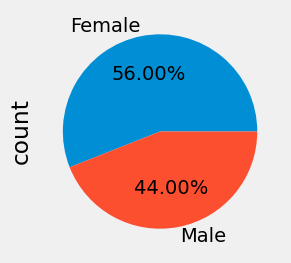

In [8]:
plt.figure(figsize=(3,3))
pd.Series(dataset['Gender']).value_counts().plot(kind ='pie', autopct='%1.2f%%')

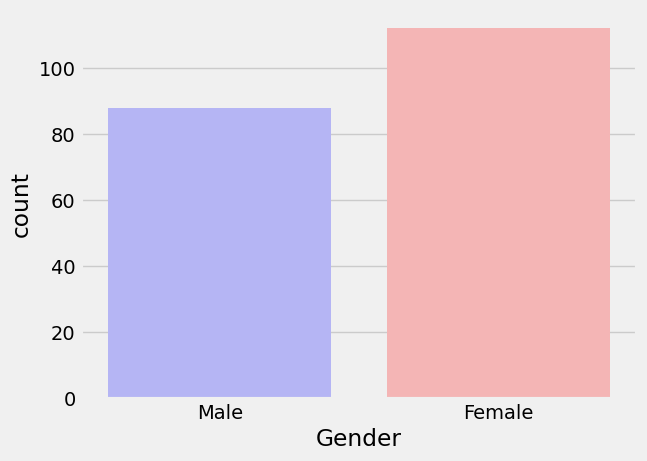

In [9]:
sns.countplot(x="Gender", data=dataset, palette="bwr")
plt.show()

**2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.**

In [10]:
dataset['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [11]:
dataset.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [12]:
# Comprobación de valores faltantes

missing_df =dataset.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Values Count']
missing_df['Filling Factor (%)']=(dataset.shape[0]-missing_df['Missing Values Count'])/dataset.shape[0]*100
missing_df.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,CustomerID,0,100.0
1,Gender,0,100.0
2,Age,0,100.0
3,Annual Income (k$),0,100.0
4,Spending Score (1-100),0,100.0


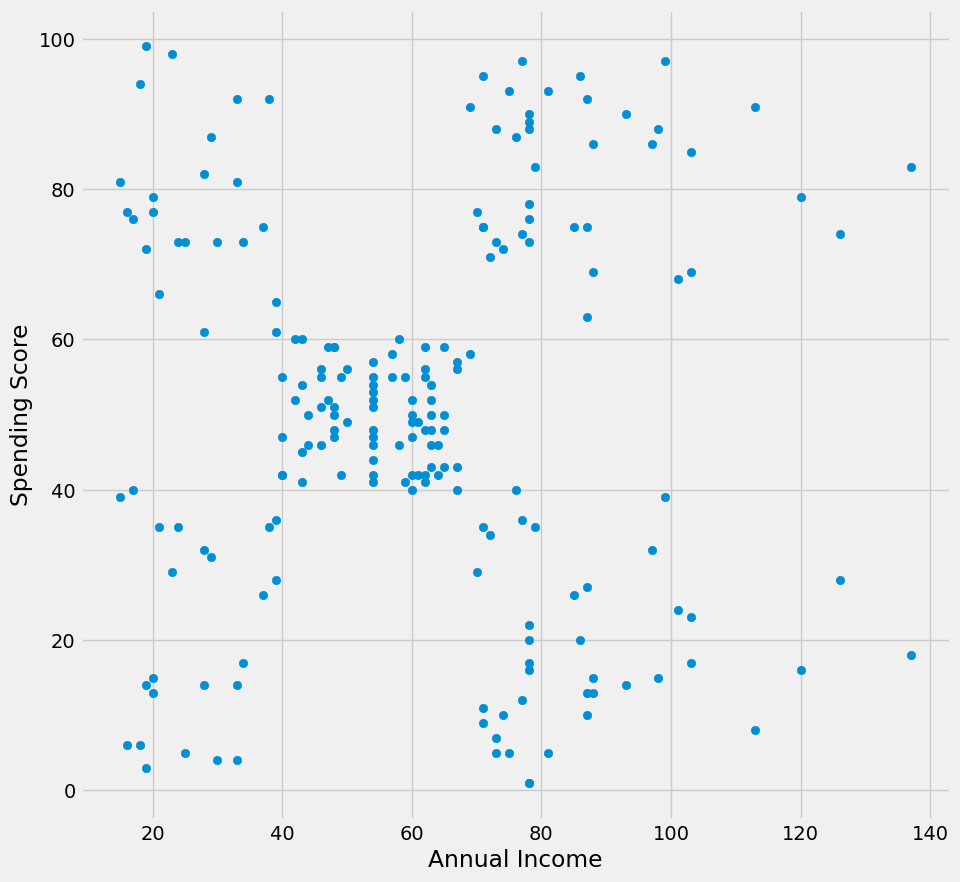

In [13]:
plt.figure(figsize = (10, 10))
plt.scatter(dataset["Annual Income (k$)"], dataset["Spending Score (1-100)"])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

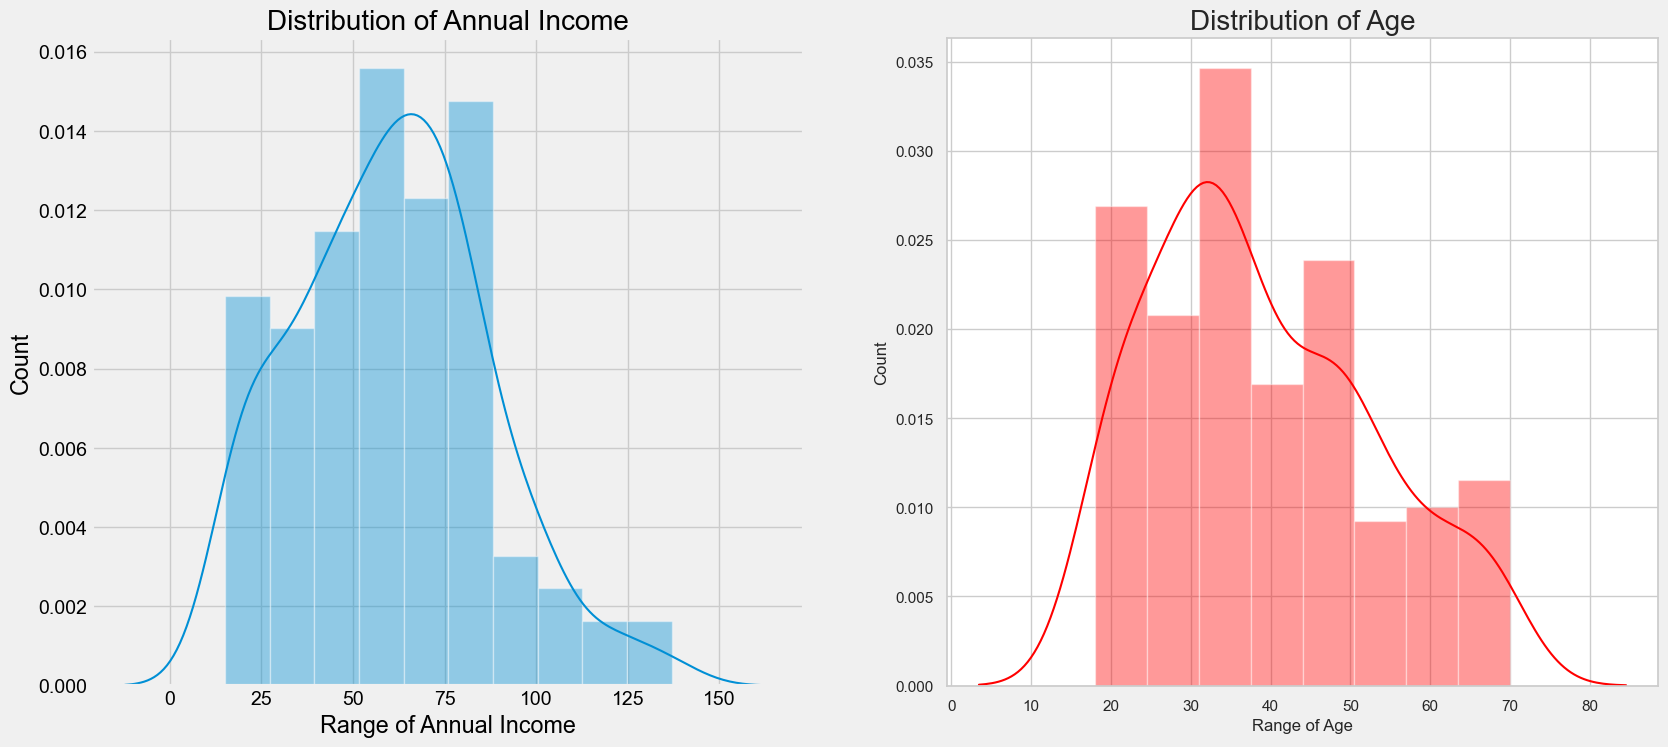

In [14]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(dataset['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(dataset['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

Al examinar los datos gráficos proporcionados, se observa un patrón distintivo en la distribución tanto de ingresos anuales como de edad de los clientes del centro comercial. Se pueden extraer las siguientes conclusiones:
**1. 
Distribución de ingreso**s* :
La mayoría de los clientes registran ingresos anuales situados en el rango de 50 a 75 dólases, con una considerable concentración en este interval* o.
Se identifica un grupo minoritario de individuos que superan los 100 dólnses de ingreso anual, mientras que un número reducido presenta ingresos cercanos al mínimo observado, alrededor de los 20 dóln
s**2. es.
Distribución de edad de los clie**n* tes:
La franja de edad más recurrente entre los clientes del centro comercial se ubica entre los 30 y 35 años, destacando como el segmento demográfico más significativo en términos de frecuencia de vis* itas.
Por otro lado, se constata que el grupo de personas mayores representa una proporción relativamente menor de visitantes, mientras que la presencia de jóvenes en el centro comercial es notablemente menor en comparación con los clientes de mediana edad. edad.

**3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.**

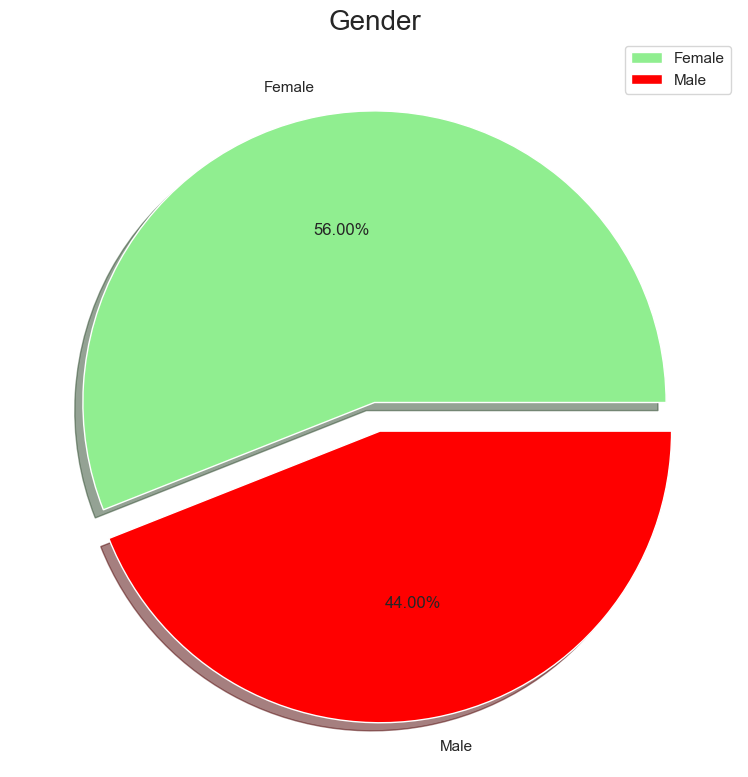

In [15]:
labels = ['Female', 'Male']
size = dataset['Gender'].value_counts()
colors = ['lightgreen', 'red']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Al analizar el gráfico circular que muestra la distribución de género en el centro comercial, se observa que las mujeres ocupan la mayoría con un 56% de participación, mientras que los hombres representan el 44% restante. Esta diferencia es notable, especialmente considerando que la población masculina es mayor en comparación con la femenina.

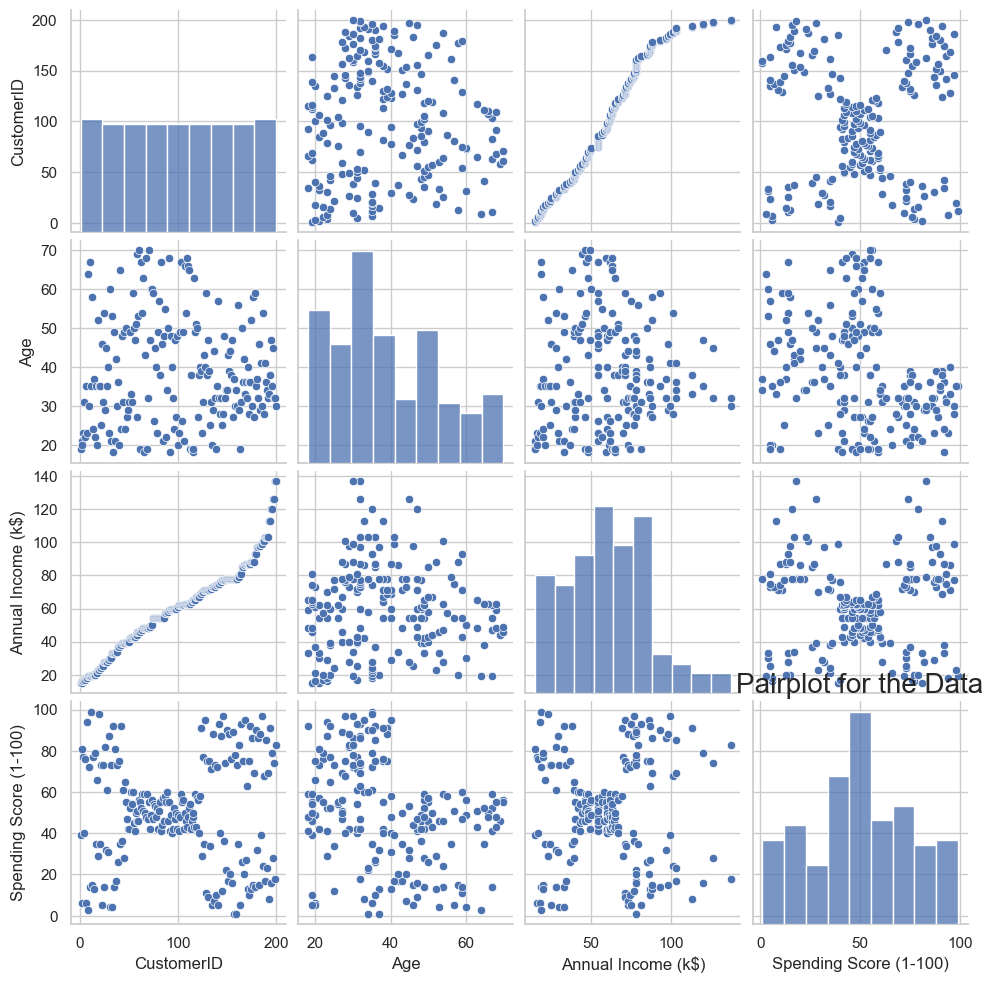

In [16]:
sns.pairplot(dataset)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

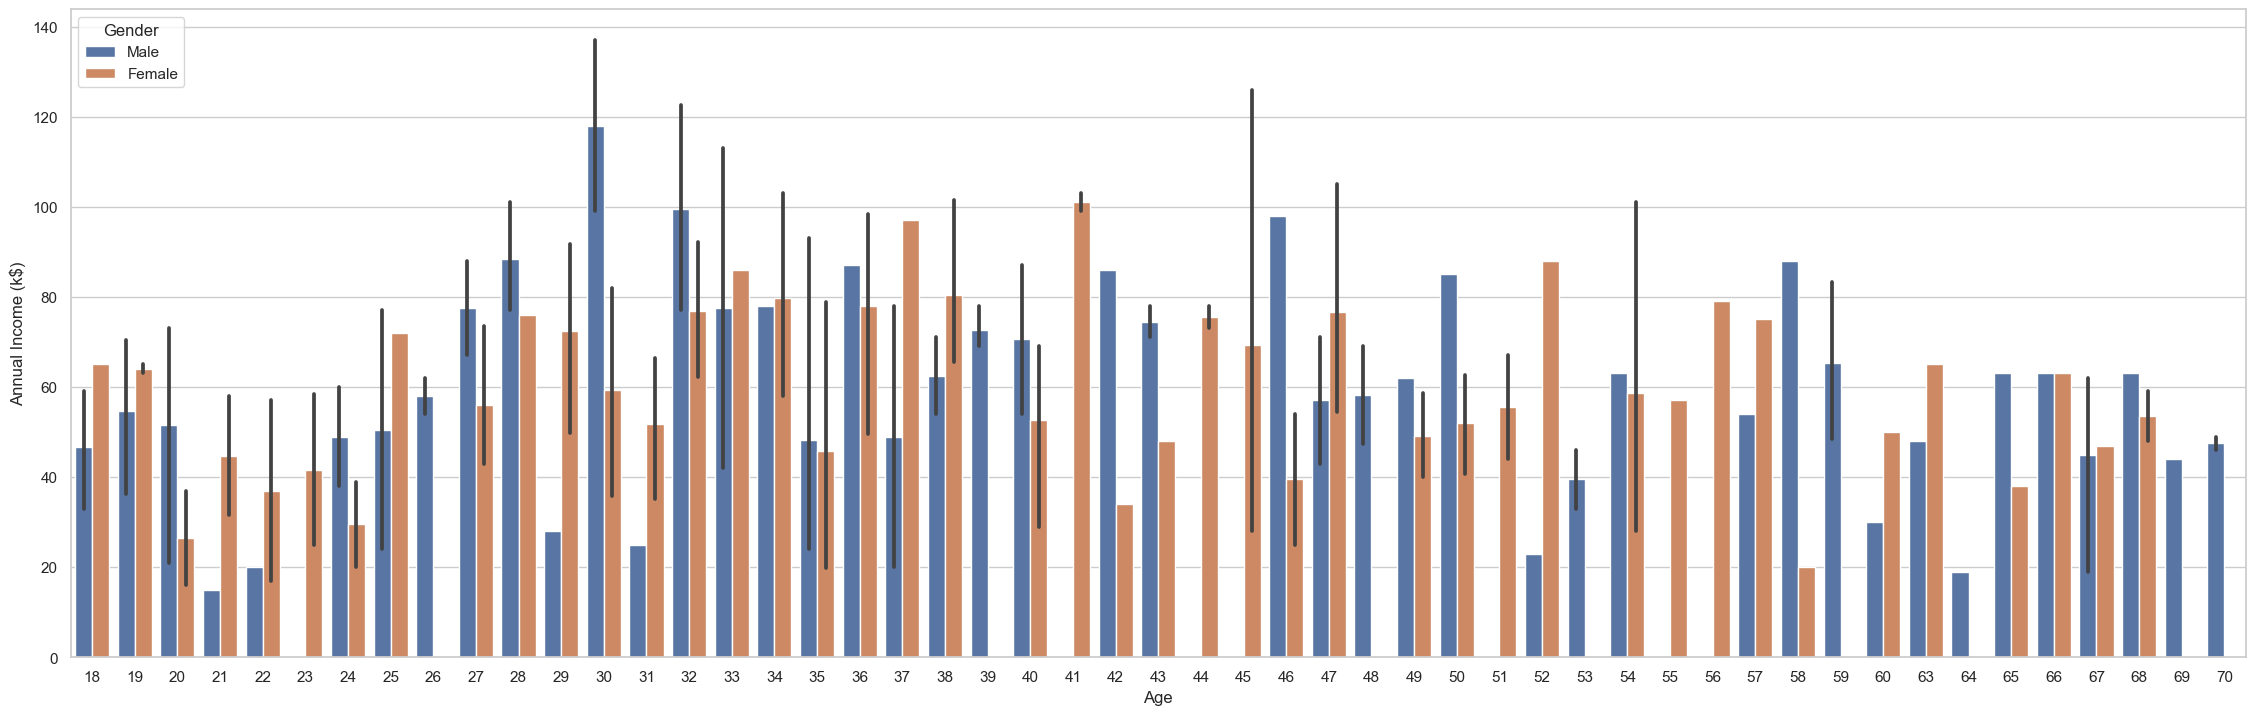

In [17]:
plt.figure(figsize=(25,8))
sns.barplot(y='Annual Income (k$)', x='Age',hue='Gender', data=dataset)
plt.show()

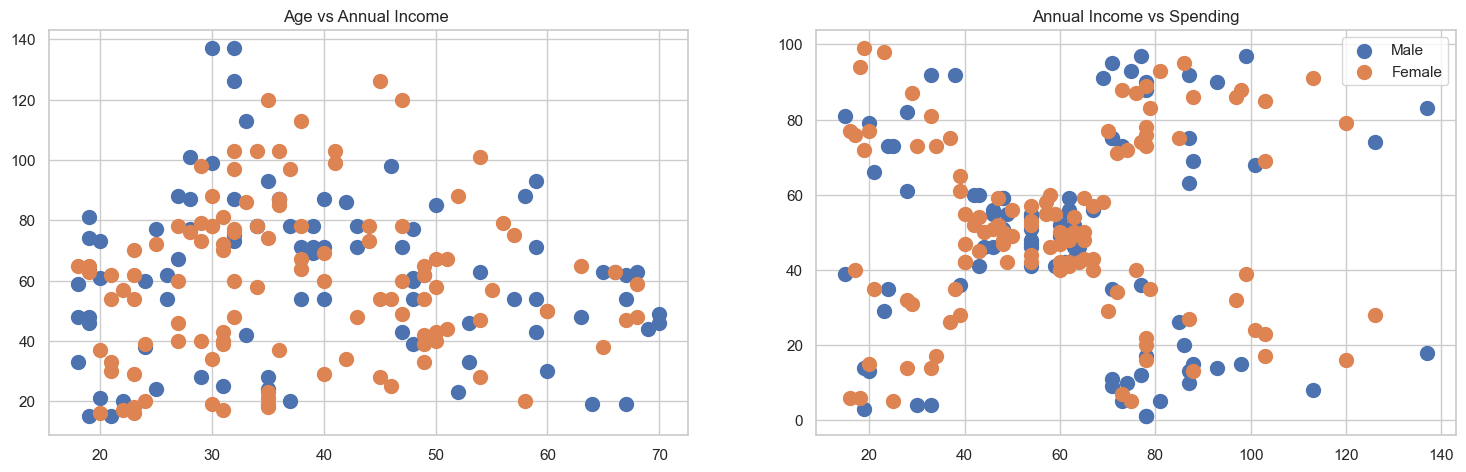

In [18]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = dataset[dataset['Gender'] == gender] ,label = gender,s=100)
    plt.title('Age vs Annual Income ')
plt.subplot(1,3,2)
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,data = dataset[dataset['Gender'] == gender] ,s = 100 , label = gender)
    plt.title('Annual Income vs Spending')
plt.legend()
plt.show()

**4.Entrenar el modelo configurando los diferentes hiperparámetros.**

In [19]:
X= dataset.iloc[:, [3,4]].values

In [20]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,15):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


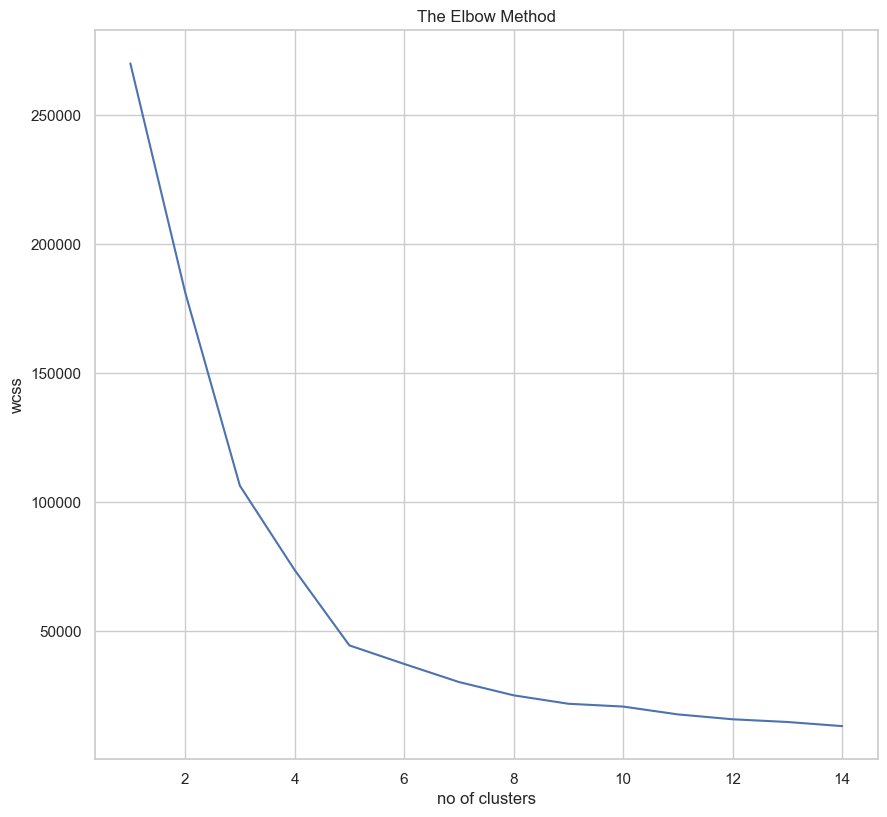

In [21]:
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

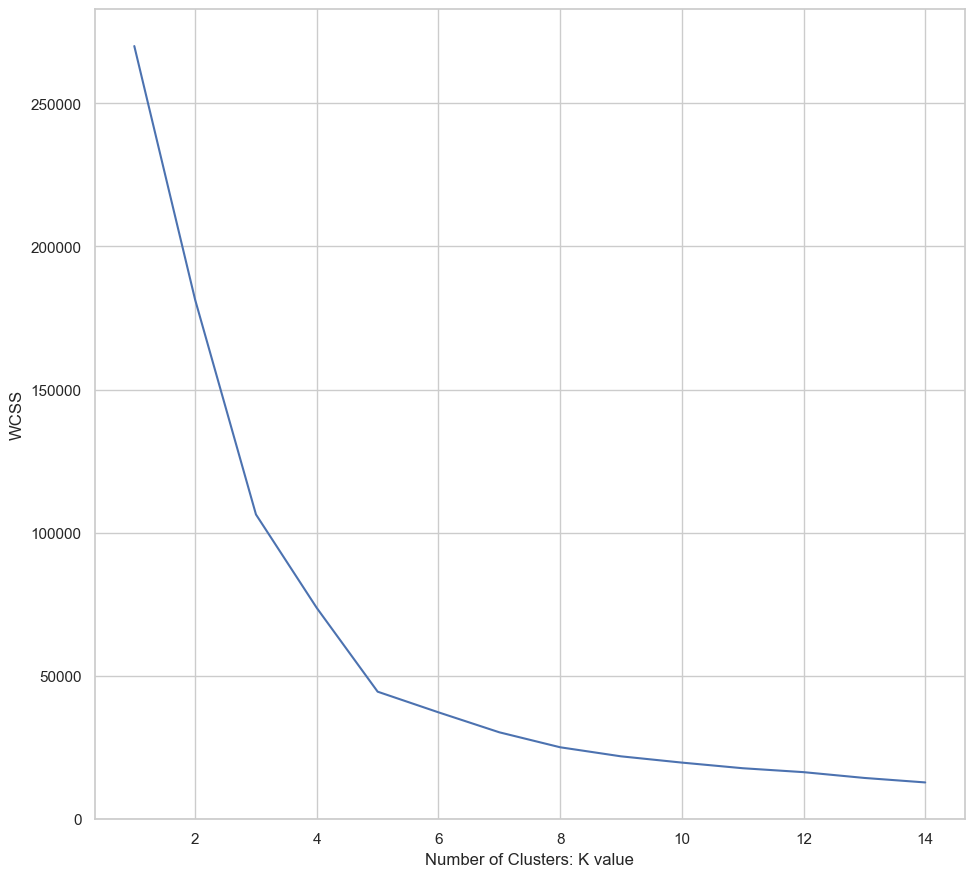

In [22]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1,15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(X)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1,15), wcss)
plt.xlabel("Number of Clusters: K value")
plt.ylabel("WCSS")
plt.show()

In [23]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

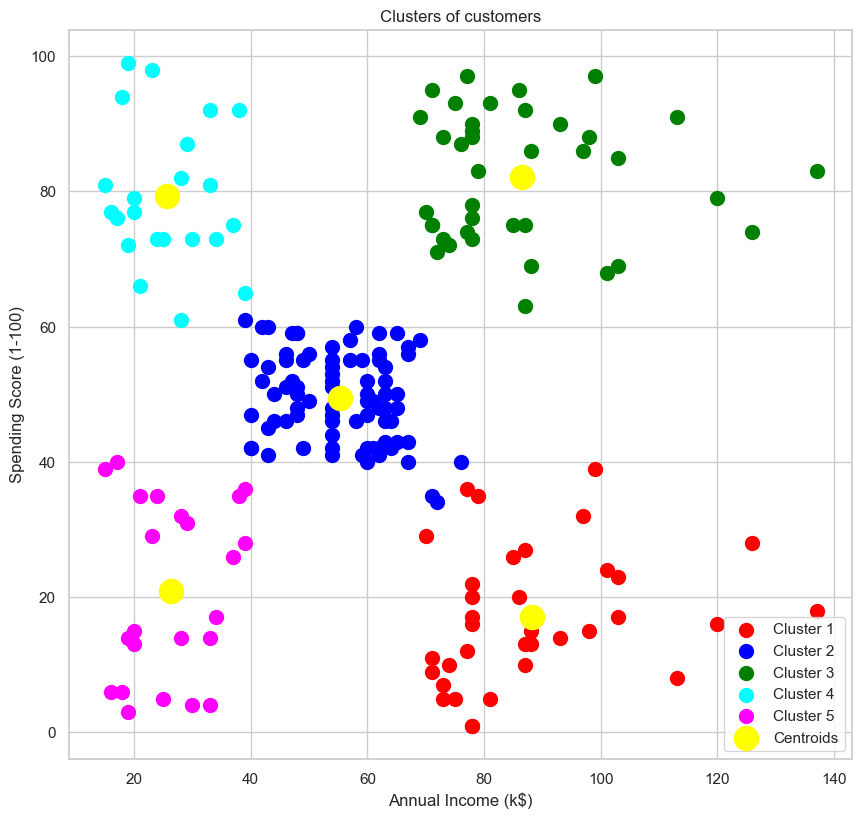

In [24]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Este análisis de agrupación proporciona una comprensión clara de los diferentes segmentos de clientes en el centro comercial, identificados en cinco grupos distintos: Grupo 1 (color rojo), Grupo 2 (color azul), Grupo 3 (color verde), Grupo 4 (color cian) y Grupo 5 (color magenta). Estos grupos se han definido según la combinación de su puntuación de ingresos y gastos anuales, considerados como los mejores factores para determinar los segmentos de clientes.

A continuación se presenta una interpretación de cada grupo:

Grupo 1 (color rojo): Caracterizado por altos ingresos pero bajos gastos. Este grupo podría estar conformado por clientes con altos niveles de ingresos que son más cautelosos en sus gastos.
Grupo 2 (color azul): Este grupo representa un perfil promedio en términos de ingresos y gastos. Sus ingresos y gastos se encuentran en un rango medio en comparación con otros segmentos.
Grupo 3 (color verde): Estos clientes tienen altos ingresos y también altos niveles de gasto. Este grupo podría representar a clientes que tienen objetivos claros de consumo y capacidad para realizar compras significativas.
Grupo 4 (color cian): Caracterizado por ingresos más bajos pero niveles de gasto relativamente altos. Este grupo puede incluir clientes que priorizan el gasto incluso con ingresos limitados.
Grupo 5 (color magenta): Representa clientes con bajos ingresos y bajos gastos. Este grupo podría incluir a clientes con presupuestos más ajustados o menor capacidad de gasto.